# Serie de Funciones para sacarle la Sopa a un abf 

Estas funciones están un poco desordenadas, pero básicamente es para que podamos abrir un abf en python2.7 y 
ver que podemos hacerle

In [1]:
from neo import io #Este es el módulo bueno

In [2]:
nomea="./Cell 5 Pyr Cs_0005.abf"

In [3]:
archivo=io.AxonIO(filename=nomea) #Esto abre el archivo completo.

Los archivos abf tienen una estructura muy compleja que viene separada en llamados bloques. Cada bloque contiene un diccionario con varios datos, que pueden ser trazos, unidades, notas sobre el experimento, etc

In [4]:
datos=archivo.read_block(lazy=False, cascade=True)

Aqui del bloque más general, que son los datos completos, extraemos el primer segmento, que es un subloque con más información. Este resultó contener dos señales analógicas, una en mA y otra en mV. python le llama a estos objetos "quantities", que es un arreglo de numpy con una constante de unidades asociada. Recordemos que python cuenta los índices desde 0, como C. Así que el primer trazo analógico está en el subloque 0 y es la señal 0.

In [5]:
canalma=datos.segments[0].analogsignals[0]

Asi podemos pedirle a ipython (la consola interactiva de python) ayuda o información sobre un objeto.

In [110]:
?canalma

Carguemos un módulo para hacer gráficas

In [6]:
import matplotlib.pyplot as plt

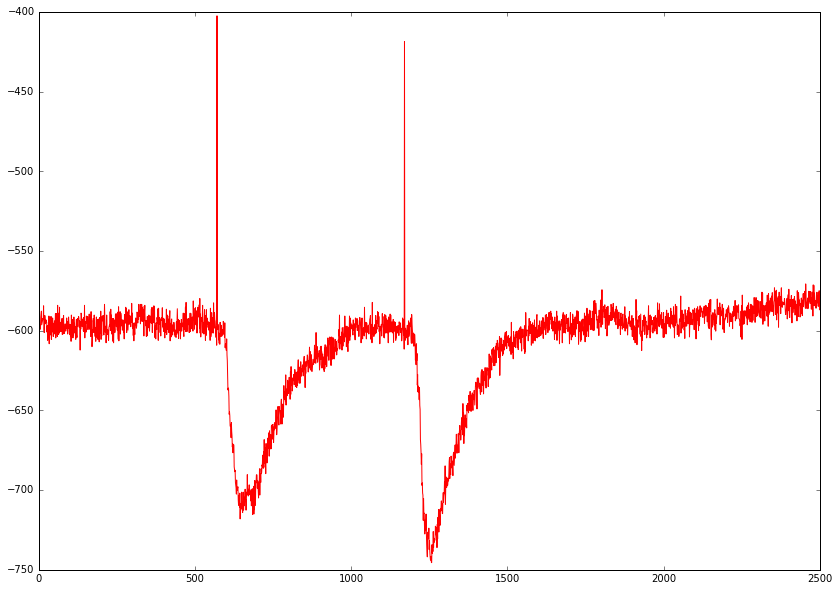

In [7]:
plt.figure(figsize=(14,10))
#plt.xlim(500,1000)
plt.plot(canalma, color="red") #la grafica de lineas es la que se usa por omisión
plt.show()

Aquí mostramos como cambiar de estilo de graficado usando el modo xkcd y guardamos la figura.

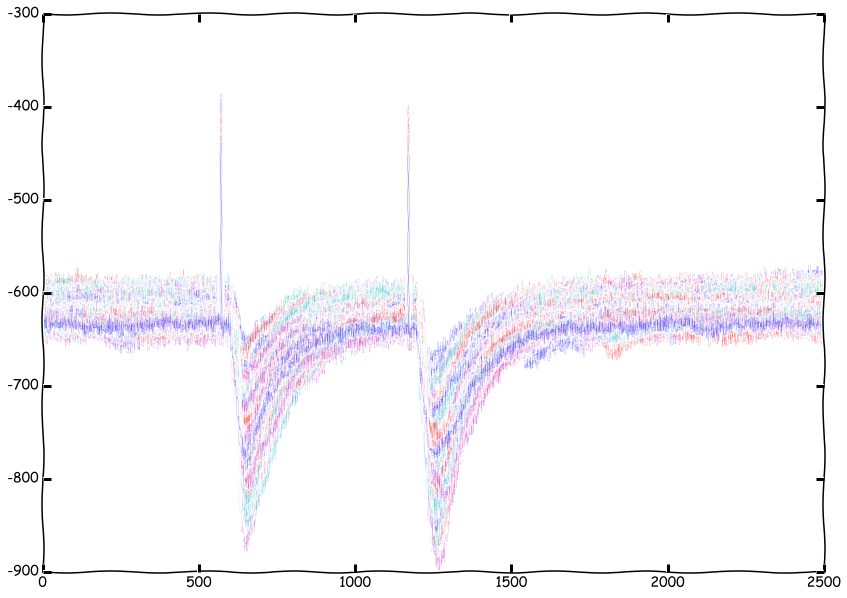

In [8]:
dibujo=plt.figure(figsize=(14,10))
with plt.xkcd():
    for i in datos.segments:
        plt.plot(i.analogsignals[0],lw=0.25,alpha=0.5)
    plt.show()

dibujo.savefig("MuchosTrazosIntraxkcd01.png",dpi=90)
plt.close()

Vamos a aprender hacer unas funciones que hagan cosa: primero, una función que nos de la distribución normal (Gaussiana).

In [9]:
import numpy as np
rango=np.arange(-5,5,0.1)
def gaussian(x):
    return np.exp(-(x**2)/2.0)/np.sqrt(2*np.pi)


#gaussianita=np.array([0,0.1,0.5,1,0.5,1,0])

Ahora mapeamos la función sobre un vector de valores, obteniendo básicamente su imagen.

In [10]:
filtrogauss=map(gaussian, rango)

Con esos objetos podemos definir un filtro pasabajos gaussiano:

In [11]:
def gaussiansuave(x):
    tantos=np.size(x)
    aux2=np.convolve(np.squeeze(x),filtrogauss)
    return aux2

Lo probamos!

In [12]:
tuabuela=gaussiansuave(canalma)

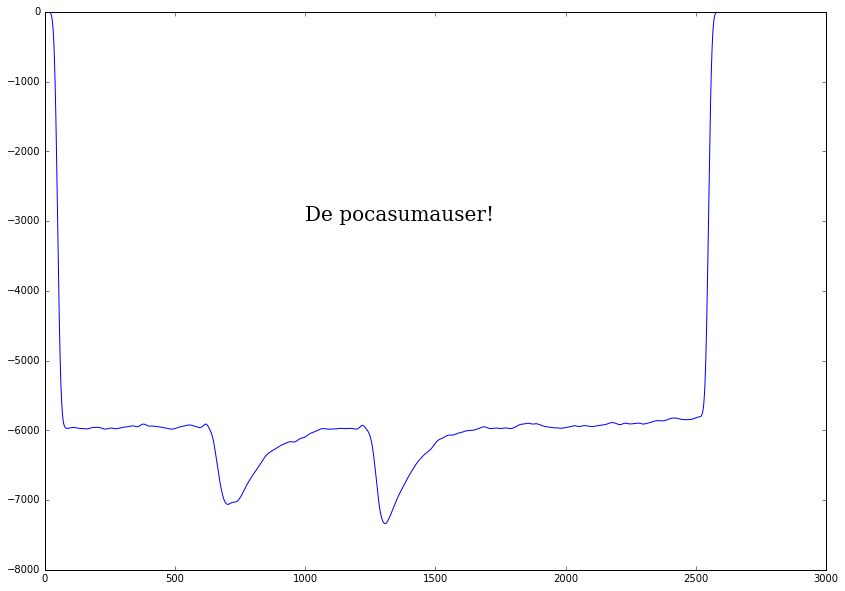

NameError: name 'close' is not defined

In [13]:
figura=plt.figure(figsize=(14,10))
plt.plot(tuabuela)
plt.text(1000,-3000, "De pocasumauser!",family="Serif",fontsize=20)
plt.show()
close(figura)